Interesting link <a href="https://yanirseroussi.com/2015/07/06/learning-about-deep-learning-through-album-cover-classification/">Album Cover CNN </a> <a href="https://github.com/yanirs/bandcamp-deep-learning/">GIT</a>
<br />
Caffe example: <a href="https://github.com/yanirs/bandcamp-deep-learning/blob/master/notebooks/02-caffe-games.ipynb">Yanirs caffe2 pretrained model</a>
<br />
<a href="https://github.com/caffe2/models">Caffe2 models</a>
<br />
<a href="https://github.com/caffe2/tutorials/blob/master/Loading_Pretrained_Models.ipynb">Loading pre-trained models in Caffe2</a>
<br/>
<a href="https://caffe2.ai/docs/tutorial-MNIST.html">CNN Caffe2 Tutorial</a>
<br />
<a href="https://towardsdatascience.com/the-softmax-function-neural-net-outputs-as-probabilities-and-ensemble-classifiers-9bd94d75932">How to use softmax output layer</a>

# Network

In [86]:
import pandas as pd
df = pd.read_csv('output_resnet.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

df2 = df#df[df.genre.isin(['metal', 'folk', 'jazz'])]
# 10 Genres
n_classes = len(df2.genre.unique())
Y = df2.genre
X = df2.iloc[:, 0:1000]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
labels = list(encoder.inverse_transform(range(0,n_classes)))
# encoded_Y = keras.utils.to_categorical(encoded_Y)
binarized_Y = label_binarize(encoded_Y, classes=range(0,n_classes))
X_train, X_test, Y_train, Y_test = train_test_split(X, binarized_Y, test_size=0.20)
labels
n_classes

10

In [88]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tensorflow.py_func(roc_auc_score, (y_true, y_pred), tensorflow.double)

def get_model(genres=10, dropout_1=0.5, output_1=128, activation_1='relu',
             dropout_2=0.5, four=False):
    
    model = Sequential()
    # Model has an input_dimension of 1000 (all the words)
    model.add(Dense(1000, input_dim=1000, activation='relu'))
    model.add(Dropout(dropout_1))      
    model.add(Dense(output_1, activation=activation_1))
    model.add(Dropout(dropout_2))
    

    #Optimizing the number of layers
    if four:
        model.add(Dense(100, activation='relu'))
        #Choosing between complete sets of layers
        model.add(Dropout(0.5))
        
    # Adding the last dense softmax layer
    model.add(Dense(genres, activation=('softmax' if genres > 2 else 'sigmoid')))
    adm = Adam(lr=0.001, beta_1=0.7, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy' if n_classes > 2 else 'binary_crossentropy',
                  optimizer=adm,
                  metrics=['accuracy'])
    return model

model = get_model(n_classes, dropout_1=0.4, output_1=512, activation_1='relu',
                 dropout_2=0.5, four=False)

history = model.fit(X_train, Y_train, validation_split=0.25, epochs=120, batch_size=16, verbose=1)

score = model.evaluate(X_test, Y_test, batch_size=128)
score

Train on 5851 samples, validate on 1951 samples
Epoch 1/120
5851/5851 [==============================] - 4s 615us/step - loss: 2.4828 - acc: 0.1024 - val_loss: 2.3078 - val_acc: 0.0897
Epoch 2/120
5851/5851 [==============================] - 2s 337us/step - loss: 2.3104 - acc: 0.1014 - val_loss: 2.3032 - val_acc: 0.0984
Epoch 3/120
5851/5851 [==============================] - 2s 345us/step - loss: 2.3051 - acc: 0.1063 - val_loss: 2.3035 - val_acc: 0.0994
Epoch 4/120
5851/5851 [==============================] - 2s 342us/step - loss: 2.3052 - acc: 0.1044 - val_loss: 2.3061 - val_acc: 0.0948
Epoch 5/120
5851/5851 [==============================] - 2s 344us/step - loss: 2.2998 - acc: 0.1108 - val_loss: 2.3043 - val_acc: 0.1030
Epoch 6/120
5851/5851 [==============================] - 2s 336us/step - loss: 2.2902 - acc: 0.1166 - val_loss: 2.3095 - val_acc: 0.0989
Epoch 7/120
5851/5851 [==============================] - 2s 361us/step - loss: 2.2819 - acc: 0.1227 - val_loss: 2.3121 - val_acc: 

5851/5851 [==============================] - 2s 333us/step - loss: 1.9072 - acc: 0.2888 - val_loss: 3.1567 - val_acc: 0.1363
Epoch 61/120
5851/5851 [==============================] - 2s 324us/step - loss: 1.9019 - acc: 0.2967 - val_loss: 3.0969 - val_acc: 0.1533
Epoch 62/120
5851/5851 [==============================] - 2s 324us/step - loss: 1.9021 - acc: 0.2875 - val_loss: 3.0964 - val_acc: 0.1445
Epoch 63/120
5851/5851 [==============================] - 2s 326us/step - loss: 1.8916 - acc: 0.2940 - val_loss: 3.1146 - val_acc: 0.1374
Epoch 64/120
5851/5851 [==============================] - 2s 325us/step - loss: 1.8876 - acc: 0.2938 - val_loss: 3.1779 - val_acc: 0.1471
Epoch 65/120
5851/5851 [==============================] - 2s 326us/step - loss: 1.8767 - acc: 0.2999 - val_loss: 3.1805 - val_acc: 0.1420
Epoch 66/120
5851/5851 [==============================] - 2s 326us/step - loss: 1.8935 - acc: 0.2952 - val_loss: 3.2102 - val_acc: 0.1404
Epoch 67/120
5851/5851 [=======================

5851/5851 [==============================] - 2s 330us/step - loss: 1.6743 - acc: 0.3887 - val_loss: 3.7174 - val_acc: 0.1543
Epoch 120/120
1951/1951 [==============================] - 0s 18us/step


[3.6364290431974364, 0.15838031772464925]

In [72]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

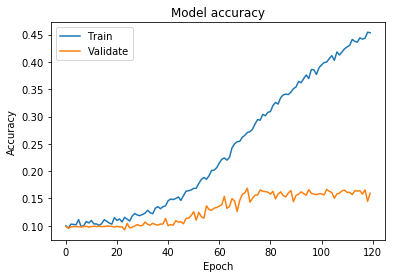

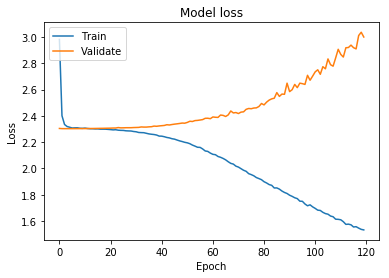

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.savefig('accuracy.png', bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.savefig('loss.png', bbox_inches='tight')
plt.show()


In [74]:
import numpy as np
y_score = model.predict(X_test, batch_size=128)
encoder.inverse_transform([np.argmax(y_score[0]), np.argmax(Y_test[0])])

array(['metal', 'punk'], dtype=object)

## Validate Model

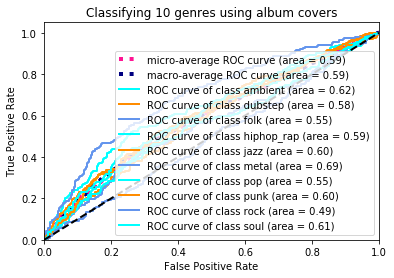

In [75]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifying 10 genres using album covers')
plt.legend(loc="lower right")
plt.savefig('aucroc.png', bbox_inches='tight')
plt.show()



## Grid search

In [7]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV


def get_model(genres=10, dropout_1=0.5, output_1=128, activation_1='relu',
             dropout_2=0.5, four=False):
    
    model = Sequential()
    # Model has an input_dimension of 1000 (all the words)
    model.add(Dense(1000, input_dim=1000, activation='relu'))
    model.add(Dropout(dropout_1))      
    model.add(Dense(output_1, activation=activation_1))
    model.add(Dropout(dropout_2))
    

    #Optimizing the number of layers
    if four:
        model.add(Dense(100, input_dim=output_1, activation='relu'))
        #Choosing between complete sets of layers
        model.add(Dropout(0.5, activation='linear'))
        
    # Adding the last dense softmax layer
    model.add(Dense(genres, activation=('softmax' if genres > 2 else 'sigmoid')))
    adm = Adam(lr=0.001, beta_1=0.7, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy' if n_classes > 2 else 'binary_crossentropy',
                  optimizer=adm,
                  metrics=['accuracy'])
    return model

k_model = KerasClassifier(build_fn=get_model, verbose=0)
# model = get_model(n_classes if n_classes > 2 else n_classes - 1)


# grid search epochs, batch size
epochs = [1, 10, 20] # add 50, 100, 150 etc
batch_size = [10, 64, 256, 512, 1000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)

grid = GridSearchCV(estimator=k_model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train) 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# result = model.fit(X_train, Y_train,
#           epochs=20,
#           batch_size=128)

# score = model.evaluate(X_test, Y_test, batch_size=128)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


InternalError: Blas GEMM launch failed : a.shape=(10, 1000), b.shape=(1000, 1000), m=10, n=1000, k=1000
	 [[{{node dense_1/MatMul}}]]
	 [[{{node loss/mul}}]]